In [13]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def date(str): 
    return str[:10]

In [3]:
#read in data 
ice_data = pd.read_csv('Ice_data.csv')
ice_data.head()

,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
0,03/09/2018,0.0,no ice info,no ice info,4.9,3.3,-0.036379
1,10/09/2018,0.0,no ice info,no ice info,1.0,1.8,-0.038345
2,17/09/2018,0.0,no ice info,no ice info,-2.5,0.1,-0.040294
3,24/09/2018,0.0,no ice info,no ice info,-4.4,-2.0,-0.029977
4,01/10/2018,0.1,no ice info,no ice info,-4.9,-4.4,-0.029508


In [4]:
ice_data['Date'] = pd.to_datetime(ice_data['Date'], dayfirst=True)  #change to datetime format 
ice_data['Concentration'].replace({'no ice':0}, inplace=True)   #replace with numerical formatting
ice_data['Concentration'] = pd.to_numeric(ice_data['Concentration'])   

In [5]:
#check formatting of dates is not in American format!!!
ice_data.sort_values(by='Date',ascending=True).head(2)

,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
0,2018-09-03,0.0,no ice info,no ice info,4.9,3.3,-0.036379
1,2018-09-10,0.0,no ice info,no ice info,1.0,1.8,-0.038345


In [6]:
#analysis of different stages of ice development 
ice_data.groupby('Stage of Development').count()  

,Date,Concentration,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
Stage of Development,,,,,,
Grey Ice,2,2,2,2,2,2
Medium first-year ice,7,7,7,7,7,7
New Ice,2,2,2,2,2,2
Thick first-year ice,24,24,24,24,24,24
Thin first-year ice,6,6,6,6,6,6
no ice info,7,7,7,7,7,7


In [7]:
#analysis of form of ice 
ice_data.groupby('Form of Ice').count()

,Date,Concentration,Stage of Development,Mean Temperature,Normal Temperature,Ice Profiler
Form of Ice,,,,,,
Fast ice,39,39,39,39,39,39
Medium floe,1,1,1,1,1,1
no ice info,8,8,8,8,8,8


In [8]:
medium_floe = ice_data[ice_data['Form of Ice']=='Medium floe']
medium_floe

,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler
46,2019-07-29,0.2,Thick first-year ice,Medium floe,6.5,8.6,0.067177


Key dates in stages of ice throughout the year <br><br>
<b> First Ice: </b>2018-10-08 <br>
<b> New ice to grey ice:</b> 2018-10-22    <br>
<b> Start of 'Thin First Year Ice':</b> 2018-11-12 <br>
<b> Start of 'Medium First Year Ice':</b> 2018-12-24 <br>
<b> Start of 'Thick First Year Ice':</b> 2018-02-11 

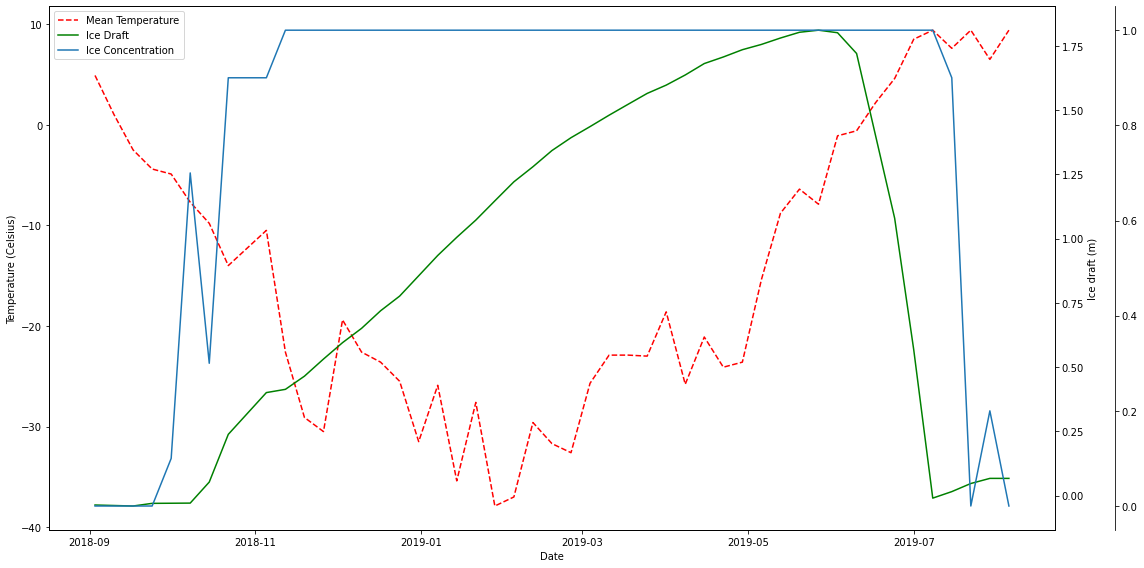

In [9]:
fig,ax = plt.subplots(figsize=(16,8))

#plot temperature data 
ax.plot(ice_data['Date'], ice_data['Mean Temperature'], label='Mean Temperature', c='r', ls='--')
ax.set_ylabel('Temperature (Celsius)')
ax.set_xlabel('Date')

#plot ice draft data on same x axis 
ax2 = ax.twinx()
ax2.plot(ice_data['Date'], ice_data['Ice Profiler'], label='Ice Draft', c='green')
ax2.set_ylabel('Ice draft (m)')

#plot normalised ice concentration data on same x axis 
ax3 = ax.twinx()
ax3.plot(ice_data['Date'], ice_data['Concentration'], label='Ice Concentration')
#ax3.set_ylabel('Ice Concentration')
ax3.spines['right'].set_position(('outward', 60))

#get labels for legend 
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()

#plot legend 
lines = lines_1 + lines_2 + lines_3
labels = labels_1 + labels_2 + labels_3
ax.legend(lines, labels, loc=0)

#plot and formatting 
plt.tight_layout()
plt.show()

In [10]:
ice_data['Temp Change'] = np.nan
for i in range(0, len(ice_data)-1): 
    ice_data['Temp Change'].loc[i+1] = (ice_data['Mean Temperature'].loc[i+1]) - (ice_data['Mean Temperature'][i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
ice_data.head()

,Date,Concentration,Stage of Development,Form of Ice,Mean Temperature,Normal Temperature,Ice Profiler,Temp Change
0,2018-09-03,0.0,no ice info,no ice info,4.9,3.3,-0.036379,NaN
1,2018-09-10,0.0,no ice info,no ice info,1.0,1.8,-0.038345,-3.9
2,2018-09-17,0.0,no ice info,no ice info,-2.5,0.1,-0.040294,-3.5
3,2018-09-24,0.0,no ice info,no ice info,-4.4,-2.0,-0.029977,-1.9
4,2018-10-01,0.1,no ice info,no ice info,-4.9,-4.4,-0.029508,-0.5


In [19]:
#dataframe with daily temperature data from Oceans2.0 website
folder_path = r'C:\Users\hjh44\OneDrive - University of Bath\Masters Project\Temperature\\'

path = folder_path + 'ShoreStation_MeteorologicalStation-Lufft_MeteorologicalStation_AirTemperature_20180801T113900Z_20190729T210100Z-NaN_clean.csv'
temp_data = pd.read_csv(path, skiprows=52)

#formatting 
temp_data.drop(temp_data.index[[0]], inplace=True)                                 #drop first row with no data 
temp_data = temp_data.iloc[: , :-3]                                                #remove last 3 columns
temp_data.set_axis(['Time', 'Air Temp', 'Flag'], axis=1, inplace=True)             #rename columns
temp_data['Date'] = temp_data['Time'].apply(date)                                  #just get date

temp_data['Date'] = pd.to_datetime(temp_data['Date'], dayfirst=True)               #convert to timestamp  
temp_data['Air Temp'] = temp_data['Air Temp'].astype(float)                        #convert to float 
daily_temp = temp_data.groupby(by='Date').mean()                                   #new df for daily average temp 
daily_temp.reset_index(inplace=True)                                               #reset index

#add temperature change column 
daily_temp['Temp Change'] = np.nan
for i in range(0, len(daily_temp)-1): 
    daily_temp.loc[i+1, 'Temp Change'] = (daily_temp.loc[i+1, 'Air Temp']) - (daily_temp.loc[i, 'Air Temp'])
    
daily_temp.head()

,Date,Air Temp,Flag,Temp Change
0,2018-08-01,6.600901,1.000000,NaN
1,2018-08-02,6.107467,1.000000,-0.493434
2,2018-08-03,6.299008,1.016667,0.191541
3,2018-08-04,8.332302,1.000000,2.033295
4,2018-08-05,7.277796,1.000000,-1.054506


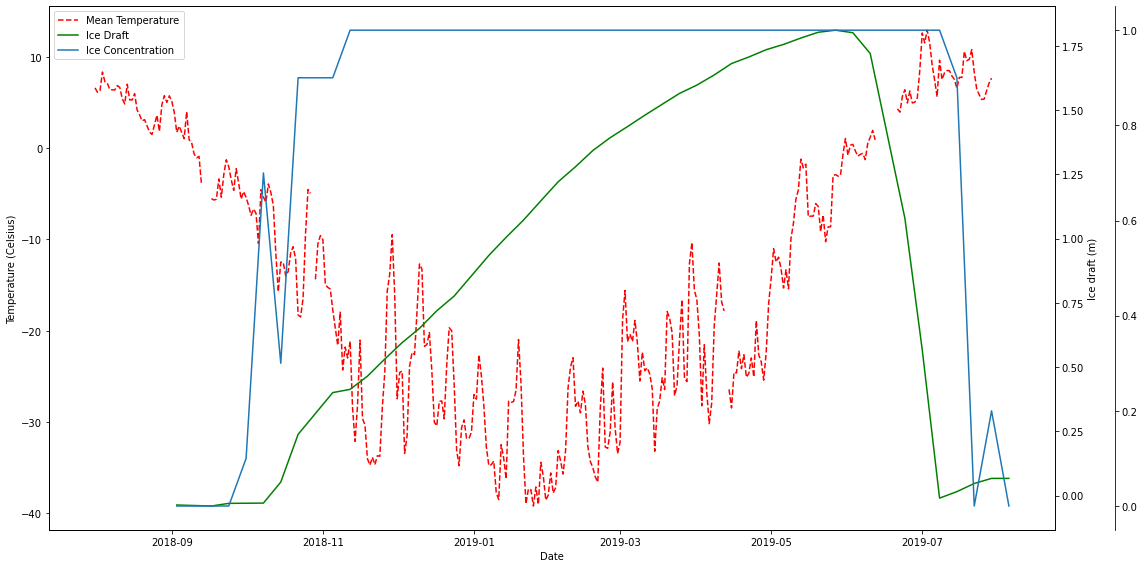

In [20]:
fig,ax = plt.subplots(figsize=(16,8))

#plot temperature data 
ax.plot(daily_temp['Date'], daily_temp['Air Temp'], label='Mean Temperature', c='r', ls='--')
ax.set_ylabel('Temperature (Celsius)')
ax.set_xlabel('Date')

#plot ice draft data on same x axis 
ax2 = ax.twinx()
ax2.plot(ice_data['Date'], ice_data['Ice Profiler'], label='Ice Draft', c='green')
ax2.set_ylabel('Ice draft (m)')

#plot normalised ice concentration data on same x axis 
ax3 = ax.twinx()
ax3.plot(ice_data['Date'], ice_data['Concentration'], label='Ice Concentration')
#ax3.set_ylabel('Ice Concentration')
ax3.spines['right'].set_position(('outward', 60))

#get labels for legend 
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()

#plot legend 
lines = lines_1 + lines_2 + lines_3
labels = labels_1 + labels_2 + labels_3
ax.legend(lines, labels, loc=0)

#plot and formatting 
plt.tight_layout()
plt.show()